Ashwin Ravi 
3122 21 5001 014
CSE-A

In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv("iris.csv")


In [13]:
print(data[data.isnull().any(axis=1)])

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [14]:
data = data.dropna(subset=['Id'])
data = data.dropna(subset=['Species'])
def g(data):
 data["SepalLengthCm"].fillna(data[data['Species'] == "Iris-setosa"]["SepalLengthCm"].mean(), inplace=True)
 data["SepalLengthCm"].fillna(data[data['Species'] == "Iris-virginica"]["SepalLengthCm"].mean(), inplace=True)
 data["SepalLengthCm"].fillna(data[data['Species'] == "Iris-versicolor"]["SepalLengthCm"].mean(), inplace=True)
 data["SepalWidthCm"].fillna(data[data['Species'] == "Iris-setosa"]
["SepalWidthCm"].mean(), inplace=True)
 data["SepalWidthCm"].fillna(data[data['Species'] == "Iris-virginica"]["SepalWidthCm"].mean(), inplace=True)
 data["SepalWidthCm"].fillna(data[data['Species'] == "Iris-versicolor"]["SepalWidthCm"].mean(), inplace=True)
 data["PetalLengthCm"].fillna(data[data['Species'] == "Iris-setosa"]["PetalLengthCm"].mean(), inplace=True)
 data["PetalLengthCm"].fillna(data[data['Species'] == "Iris-virginica"]["PetalLengthCm"].mean(), inplace=True)
 data["PetalLengthCm"].fillna(data[data['Species'] == "Iris-versicolor"]["PetalLengthCm"].mean(), inplace=True)
 data["PetalWidthCm"].fillna(data[data['Species'] == "Iris-setosa"]
["PetalWidthCm"].mean(), inplace=True)
 data["PetalWidthCm"].fillna(data[data['Species'] == "Iris-virginica"]["PetalWidthCm"].mean(), inplace=True)
 data["PetalWidthCm"].fillna(data[data['Species'] == "Iris-versicolor"]["PetalWidthCm"].mean(), inplace=True)
 return data
data = g(data)



C:\Users\ashwi\AppData\Local\Temp\ipykernel_18504\2104727502.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["SepalLengthCm"].fillna(data[data['Species'] == "Iris-setosa"]["SepalLengthCm"].mean(), inplace=True)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_18504\2104727502.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [15]:
len(data)

150

In [16]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
data.groupby('Species').describe()


Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

In [18]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

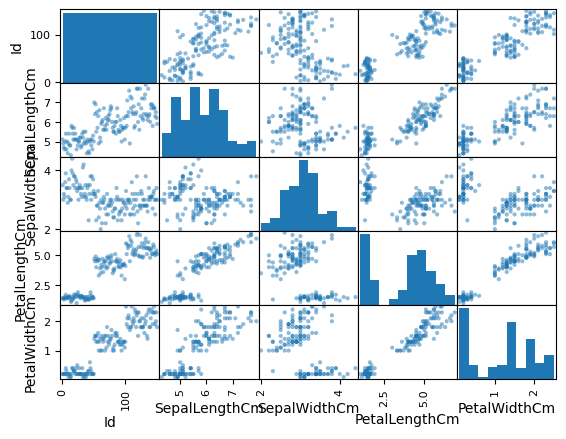

In [19]:
from matplotlib import pyplot as plt
pd.plotting.scatter_matrix(data)
plt.show()

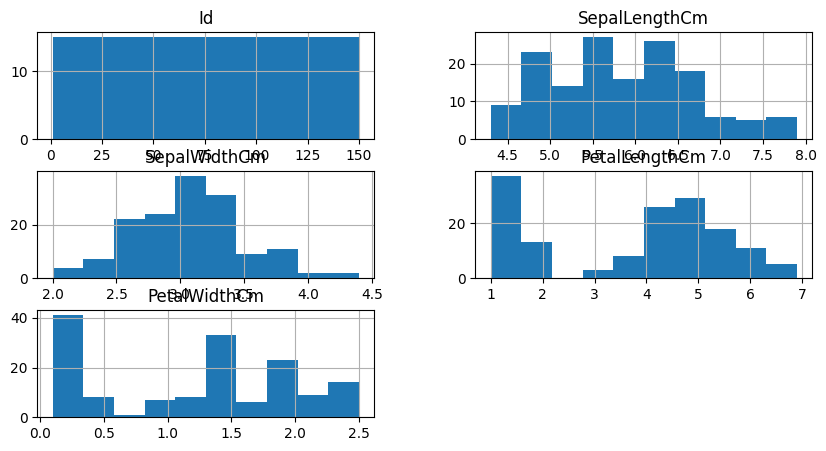

In [20]:
data.hist(bins=10, figsize=(10, 5))
plt.show()

In [21]:
y = data['Species']
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 
'PetalWidthCm']]
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=42)
print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in testing set: {len(X_test)}")

Number of samples in training set: 120
Number of samples in testing set: 30


In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Testing Set: {accuracy}")

Model Accuracy on Testing Set: 1.0
